In [25]:
import pandas as pd
import numpy as np

s = pd.Series([1,3,5, np.nan, 6,8])
#'lista' pandas
dates = pd.date_range('20130101', periods = 6)
# database in base ad una lista
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list("ABCD"))
#print(df)
 # dataframe in base ad un dizionario
df2 = pd.DataFrame(
    {
        'A' : 1.0,
        'B' : pd.Timestamp('20130102'),
        'C' : pd.Series(1, index=list(range(4)), dtype='float32'),
        'D' : np.array([3] * 4, dtype='int32'),
        'E' : pd.Categorical(['test', 'train', 'test', 'train']),
        'F' : 'foo'
    }
)

df.dtypes # tipo colonne

df2.head() # prime righe dataframe
df.tail(2) # ultime righe 
df.index # indici righe
df.columns # nomi colonne
df.to_numpy # trasformare DataFrame in array numpy

df2.dtypes
df2.to_numpy
df.describe() # piccolo riepilogo delle statistiche dei dati
#df2.head()
#df2.T # trasposizione dei dati le righe diventano colonne e viceversa
df.sort_index(axis=1, ascending=False) # ordina inbase ad un asse
df.sort_values(by='B')
df['A'] # prendo solo la colonna 'A'
df[0:3] # seleziono le righe da 0 a 3
df["20130102":"20130104"] # seleziono le righe da a in base all'indice
df.loc[dates[0]] # riga corrispondente a un'etichetta
df.loc[:,['A','B']] # seleziono tutte le righe delle colonne a e b
df.loc['20130102':'20130104',['A', 'B']] # seleziono dall'eticatta ad etichetta, delle colonne a e b 
df.loc[dates[0], 'A'] # valore scalare tramite etichetta di riga e colonna
df.at[dates[0], 'A'] #stessa cosa sopra
df.iloc[3] # righa zero di ogni colonna
df.iloc[3:5, 0:2] # dalla riga 3 alla riga 5, dalla colonna 0 alla 2
df.iloc[[1,2,4], [0,2]] # prendi tot righe [1,2,4] e tot colonne [0,2]
df.iloc[1:3, :] #prendi dalla riga 1 a 3, di tutte le colonne
df.iloc[:, 1:3] #prendi tu le righe, dalla colonna 1 a 3
df.iloc[1,1] #prendi un preciso valore 
df.iat[1,1] #stessa cosa di sopra
df[df['A'] > 0] # seleziona le righe dove gli elementi di 'A' sono maggiori di 0
df[df > 0] # seleziona i valori che sono maggiori di zero
df2 = df.copy() # creo un nuovo dataframe che è la copia di df

df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three'] # aggiungo una nuova series denominata 'E' e i suoi rispettivi valori
df2[df2['E'].isin(['two', 'four'])] # seleziona i valori dove il valore di 'E' sta nella lista passata

s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6)) # creo una nuova series s1
df['F'] = s1 # creo una nuova colonna nel dataframe chiamata 'F' e gli assegno i valori di s1
df.at[dates[0], 'A'] = 0 # imposto i valori in base all'etichetta
df.iat[0,1] = 0 # imposto i valori in base alla posizione
df.loc[:, 'D'] = np.array([5] * len(df)) # assegno a tutte le righe della nuova colonna 'D' i valori presenti in [5,5,5,5,5,5]

df2 = df.copy()
df2[df2 > 0] = -df2 # faccio diventare tutto negativo
# print(df)
# print()
#La reindicizzazione consente di modificare/aggiungere/eliminare l'indice su un asse specificato
# prendi il df dalla riga 0 alla 4, e tutte le colonne aggiungendo 'E'
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0] : dates[1], 'E'] = 1

df1.dropna(how='any') # elimina tutte le righe dove c'è un valore mancante
df1.fillna(value=5) # dove il valore è amncante, sostituiscilo con 5
pd.isna(df1) # maschera booleana dove i valori sono nan e viceversa

df.mean() # calcola il valore medio per ogni colonna
df.mean(axis=1) # calcola il valore medio per ogni riga
s = pd.Series([1,3,5, np.nan, 6,8], index=dates).shift(2)
df.sub(s, axis='index')

df.agg(lambda x: np.mean(x) * 5.6) # applica ad ogni colonna la funzione passata
df.transform(lambda x: x * 101.2) # applica ad ogni colonna la funzione passata

s = pd.Series(np.random.randint(0, 7, size = 10)) # creo una series di 10 numeri con numeri che vanno da 0 a 7
s.value_counts() # per ogni numero conta quante ricorrenze ci sono

s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower() # converte tutti i valori stringa in minuscolo, altrimenti nan

df = pd.DataFrame(np.random.randn(10,4)) # creo un dataframe con 10 righe e 4 colonne di numeri casuali
pieces = [df[:3], df[3:7], df[7:]] # creo una matrice contenente il dataframe diviso 3
pd.concat(pieces) # concateno i pezzi ottenendo di nuovo il dataframe

# creo 2 DataFrame, uno chiamato destro e uno sinistro con una colonna fatta di chiavi e una di valori
left = pd.DataFrame({'Key':['foo', 'foo'], 'lval': [1,2]})
right = pd.DataFrame({'key':['foo','foo'], 'rval': [4,5]})
# Li unisco tramite la colonna key
#pd.merge(left, right, on='key') 

# # CREO un nuovo dataframe
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)

# per ogni elemento di a senza doppioni, dammi la somma dei vaori in c e d
df.groupby('A')[['C','D']].sum()

# per ogni elemento di a e poi di b, calcola la somma
df.groupby(['A', 'B']).sum()
#print(df)


arrays = [
   ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
   ["one", "two", "one", "two", "one", "two", "one", "two"],
]
# creo un indice composto da 2 indici
index = pd.MultiIndex.from_arrays(arrays, names=['first', 'second'])
# creo un dataframe con l'indice composto denominando le colonne con a e b
df = pd.DataFrame(np.random.randn(8,2), index=index, columns=['A', 'B'])
df2 = df[:4]

# comprime in livello a pila
stacked = df2.stack(future_stack=True)

# print(df2)
# print()
# print(stacked)
# print()
# print(stacked.unstack())
# print()
# print(stacked.unstack(1))
# print()
# print(stacked.unstack(0))
# print()
# # elimina il precedente stack
# #stacked.unstack(1)

df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)

pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

# creo un range index composta da un periodo di 10 secondi 's' partendo da una determinata data
rng = pd.date_range('1/1/2012', periods=10, freq='s')
# creo una serie di numeri random da 0 e 500 in base alla lunghezza di rng affiancando l'index
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

# creo un indice composto da un periodo di 5 giorni 'D'
rng = pd.date_range('3/6/2012 00:00', periods = 5, freq='D')

ts = pd.Series(np.random.randn(len(rng)), rng)
# aggiungo una fase temporale
ts_utc = ts.tz_localize('UTC')                
#[ts_utc

# converto una serie temporale compatibile con i fusi orari in un altro fuso orario
ts_utc.tz_convert('US/Eastern')
# aggiunta di una durata non fissa
rng + pd.offsets.BusinessDay(5)

#creo un dataframe con degli indici grezzi
df = pd.DataFrame(
    {'id':[1,2,3,4,5,6], 'raw_grade' : ["a", "b", "b", "a", "a", "e"]}
)
# creo la colonna grade che trasforma gli indici grezzi in categorie, togiendo i doppioni
df['grade'] = df['raw_grade'].astype('category')
# creo una lista di nomi di categorie
new_categories = ['very good', 'good', 'very bad']
# ridefinisco la colonna grade rinominando i nomi delle categorie
df['grade'] = df['grade'].cat.rename_categories(new_categories)
# stessa cosa di sopra
df['grade'] = df['grade'].cat.set_categories(['very bad', 'bad', 'medium','good', 'very good'])
# riordino il dataframe in base ai valori di grade
df.sort_values(by='grade')
# mostro quanti valori ci sono per ogni categoria comprese quelle con 0
df.groupby('grade', observed=False).size()


import matplotlib.pyplot as plt
# chiudo il grafico
plt.close('all')

ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
#ts.plot()
df = pd.DataFrame(
    np.random.randn(1000,4), index=ts.index, columns=['A', 'B', 'C', 'D']
)

df = df.cumsum()
plt.figure()
df.plot()

plt.legend(loc='best')

plt.close()

# creo una dataframe
df = pd.DataFrame(np.random.randint(0, 5, (10, 5)))
# scrivo il dataframe in un csv
df.to_csv('foo.csv')
# scrivo il dataframe in un file parquet
#df.to_parquet("foo.parquet")
#leggo ll file parquet
#pd.read_parquet('foo.parquet)

# scrivo l'excel con sheet 1
df.to_excel('foo.xlsx', sheet_name='Sheet1')
# leggo il file excel
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

#####
# creo un dataframe
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], 
     "BBB": [10, 20, 30, 40], 
     "CCC": [100, 50, -30, -50]}
)

# modifico il dataframe assegnando all'elemento di 'BBB' -1 se l'elemento in 'AAA' è >= 5
df.loc[df.AAA >= 5, 'BBB'] = -1

# modifico il dataframe assegnando agli elementi in 'BBB', 'CCC' 555, se l'elemento in 'AAA' è >= 5
df.loc[df['AAA'] >= 5, ['BBB', 'CCC']] = 555
# stessa cosa sopra
df.loc[df.AAA < 5, ['BBB', 'CCC']] = 2000

# creo una maschera che deve essere applicata sopra un dafarame
df_mask = pd.DataFrame(
    {'AAA':[True] * 4, 'BBB': [False] * 4, 'CCC': [True, False] * 2}
)
# dove corrisponde sostituisci con -1000
df.where(df_mask, -1000)

# creo un dataframe
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

# creo una colonna 'logic' che come valore ha 'high' se il valore in 'AAA' è maggiore di 5, altrimenti 'low'
df['logic'] = np.where(df['AAA'] > 5, 'high', 'low' )

# creo un dataframe
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

# ritorna solo i valori che rispettano una determinata condizione
df[df.AAA <= 5]

#stessa cosa sopra
df[df.AAA > 5]

# creo un dataframe
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

# ritorna una serie di solo i valore della colonna 'AAA', dove il valore in BBB è < di 25 e in CCC è >= di -40
df.loc[(df['BBB'] < 25) & (df['CCC'] >= -40), 'AAA']

# ritorna una serie di solo i valori della colonna 'BBB', dove il valore in 'BBB' è > 25 o in 'CCC' è >= di -40
df.loc[(df['BBB'] > 25 ) | (df['CCC'] >= -40), 'AAA']

# prendi i valori i valori della colonna 'BBB', dove il valore in 'BBB' è > 25 o in 'CCC' è >= di 75 e sostituiscili con 999 nella colonna 'AAA'
df.loc[(df['BBB'] > 25) | (df['CCC'] >= 75), 'AAA'] = 999

df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

# creo un valore di riferimento
aValue = 43.0
# prendo ogni valore in CCC stottraggi il valore di rifermiento e salvo il resto, e poi riordino in base a quello
df.loc[(df.CCC - aValue).abs().argsort()]

df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)
# creo tre series per ogni colonna, dove i valori sono true o false in base alla condizione
Crit1 = df.AAA <= 5.5
Crit2 = df.BBB == 10.0
Crit3 = df.CCC > -40.0
# creo una serie unendo le varie series sommando i false e true
AllCrit = Crit1 & Crit2 & Crit3
df[AllCrit]

#
import functools
# Creo una lista con le tre series
CritList = [Crit1, Crit2, Crit3]
# uso funtoools. che confronta i valori tra false e true
AllCrit = functools.reduce(lambda x, y: x & y, CritList)
#  creo un dataframe con i risultati
df[AllCrit]
# prendo tutti i valori in AAA che sono minori o uguali a 6 e dove l'indice '0,2,4'
df[(df.AAA <= 6) & (df.index.isin([0,2,4]))]


df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7],
     "BBB": [10, 20, 30, 40], 
     "CCC": [100, 50, -30, -50]},
    index=["foo", "bar", "boo", "kar"],
)

# seleziono da''indice bar a kar
df.loc['bar':'kar'] # label
# seleziona gli elemnti dalla riga 0 alla 3 esclusa
df[0:3]

df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7],
     "BBB": [10, 20, 30, 40], 
     "CCC": [100, 50, -30, -50]},
)

# creo un data frame con un dataframe già esistente ma con un indice diversp
df2 = pd.DataFrame(data=df, index=[1,2,3,4]) # Note index starts at 1
#df2
df2.iloc[1:3] # Position-oriented
df2.loc[1:3] # Label-oriented

# prendi i valori che non sono <= di 6 e gli indici non siano nella lista
df[~((df.AAA <= 6) & (df.index.isin([0,2,4])))]

df = pd.DataFrame({
    "AAA": [1, 2, 1, 3], 
    "BBB": [1, 1, 2, 2], 
    "CCC": [2, 1, 3, 1]})

# prendo i nomi delle colonee
source_cols = df.columns # Or some subset would work too
# creo una lista che per ogni colonna creo una colonna con lo stesso nome aggiungendo '_cat'
new_cols = [str(x) + '_cat' for x in source_cols]
# creo tre categorie
categories = {1:'Alpha', 2:'Beta', 3:'Charlie'}
# creo una nuova colonna che in base al valore delle colonne standard, assegna una categoria
df[new_cols] = df[source_cols].map(categories.get)

df = pd.DataFrame(
    {"AAA": [1, 1, 1, 2, 2, 2, 3, 3], 
     "BBB": [2, 1, 3, 4, 5, 1, 2, 3]}
)

# per ottenere l'indice dei minimo
df.loc[df.groupby('AAA')['BBB'].idxmin()]
# ordina, quindi prendi il primo di ciascuno, stessi risultati ma con indice diverso
df.sort_values(by='BBB').groupby('AAA', as_index=False).first()

df = pd.DataFrame(
    {
        "row": [0, 1, 2],
        "One_X": [1.1, 1.1, 1.1],
        "One_Y": [1.2, 1.2, 1.2],
        "Two_X": [1.11, 1.11, 1.11],
        "Two_Y": [1.22, 1.22, 1.22],
    }
)
# faccio diventare l'index principale la colonna row
df = df.set_index('row')
# creo un multi indice dividendo i nomi tramite _, e per ognuno assegna un sotto indice
df.columns = pd.MultiIndex.from_tuples([tuple(c.split('_')) for c in df.columns])
# cambia forma al dataframe
df = df.stack(0, future_stack=True).reset_index(1)
# rinomino le colonne
df.columns = ['Sample', 'All_X', 'All_y']

# creo un multiindice composto da 3 valori e ognuno composto da 2 sottoindici
cols = pd.MultiIndex.from_tuples(
    [(x,y) for x in ['A', 'B', 'C'] for y in ['0', 'I']]
)
# creo un dataframe composto da valori casuali tra 2 e 6 e da 2 indici, n e m, e come colonne i multindici 
df = pd.DataFrame(np.random.randn(2,6), index=['n','m'], columns=cols)
# divido ogni elemento della riga in base al valore corrispondente nella colonna c
df = df.div(df['C'], level=1)

#creo una lista di tuple
coords = [('AA', 'one'), ('AA', 'six'), ('BB', 'one'), ('BB', 'two'), ('BB', 'six')]
# creo un multiindice passando la lista di tuple
index = pd.MultiIndex.from_tuples(coords)
# creo un dataframe con tre colonne
    # La prima con il primo elemento delle tuple (primo livelo)
    # La seconda con il secondo elemento delle tuple (secondo livello)
    # La terza con valori passati in una lista (terzo livello)

df = pd.DataFrame([11,22,33,44,55], index, ['MyData'] )
# prendo la sezione trasversale del 1° livello e del 1° asse
# prendo i valori sottostanti al primo livello nell'indice 'BB'
df.xs('BB', level=0, axis=0)
# prendo i valori del seocndo livello che hanno come indice 'six'
df.xs('six', level=1, axis=0)

import itertools
# creo una lista di tuple con le varie combinazioni
index = list(itertools.product(['Ada', 'Quinn', 'Violet'], ['Comp', 'Math', 'Sci']))
# creo una lista di tuple con le varie combinazioni
headr = list(itertools.product(['Exam', 'Labs'], ['I', 'II']))
# creo un indice indx multiindice che come valori ha una lista di tuple index
indx = pd.MultiIndex.from_tuples(index, names=['Student', 'Course'])
# creo un multiindice cols che come valori ha una lista di tuple headr
cols = pd.MultiIndex.from_tuples(headr) # Notice these are un-named
# creo una lista di liste
data = [[70 + x + y + (x*y) %3 for x in range(4)] for y in range(9)]
# ora creo il dataframe pssando i valori, il primo livello di indice ed il secondo
df = pd.DataFrame(data, indx, cols)
All = slice(None)
# prendo i valori dello studente 'Violet'
df.loc['Violet']
# prendo solo i valori del corso di math
df.loc[(All, 'Math'), All]
# prendo gli studenti da ada a queen dove il corso è math
df.loc[(slice('Ada', 'Quinn'), 'Math'), All]
# 
df.loc[(All, 'Math'), (All, 'II')]

# ordino per una colonna o per un elenco
df.sort_values(by=('Labs', 'II'), ascending=False)

# DATI MANCANTI
# Creo un dataframe
    # indice 6 giorni
df = pd.DataFrame(
    np.random.randn(6,1),
    index = pd.date_range('2013-08-01', periods=6, freq='B'),
    columns = list('A'),
)
# modifico il valore alla posizione 3 della colonna a con nan
df.loc[df.index[3], 'A'] = np.nan

df.bfill()

# RAGGRUPPAMENTO
# creo un dataframe
df = pd.DataFrame(
    {
        "animal": "cat dog cat fish dog cat cat".split(),
        "size": list("SSMMMLL"),
        "weight": [8, 10, 11, 1, 20, 12, 12],
        "adult": [False] * 5 + [True] * 2,
    }
)

# raggruppa gli animali in base alla taglia e al peso
df.groupby("animal").apply(lambda subf: subf["size"][subf["weight"].idxmax()])#, include_groups=False)
#raggruppba in base ad 'animal'
gb = df.groupby('animal')
# estrai solo 'cat'
gb.get_group('cat')

def GrowUp(x):
    avg_weight = sum(x[x["size"] == "S"].weight * 1.5)
    avg_weight += sum(x[x["size"] == "M"].weight * 1.25)
    avg_weight += sum(x[x["size"] == "L"].weight)
    avg_weight /= len(x)
    return pd.Series(["L", avg_weight, True], index=["size", "weight", "adult"])

# per ogni elemnto nel dataframe applica la funzione grouwup
expected_df = gb.apply(GrowUp)#, include_groups=False)
# ritorna un dataframe con la somma del peso medio per ciascun elemento
#expected_df

#creo una lista di 10 elementi
S = pd.Series([i / 100.0 for i in range(1,11)])
# definisco una fuinzione che prende 2 valori e ritorna il prodotto tra x e y+1
def cum_ret(x,y):
    return x * (1+y)

# definisco una funzione che prende 1 valore
def red(x):
    return functools.reduce(cum_ret, x, 1.0)
# applico le funzioni a s
S.expanding().apply(red, raw=True)

# Creo un dataframe
df = pd.DataFrame({'A': [1, 1, 2, 2], "B": [1, -1, 1, 2]})
# creo gb, raggruppando per a
gb = df.groupby('A')

# creo una funzione che prend eun valore, in base alla condizione, la maschera è vera o falsa
# sostituzione di alcuni valori con la media del resto
def replace(g):
    mask = g < 0
    return g.where(~mask, g[~mask].mean())
# applica a gb
gb.transform(replace)

df = pd.DataFrame(
    {
        "code": ["foo", "bar", "baz"] * 2,
        "data": [0.16, -0.21, 0.33, 0.45, -0.59, 0.62],
        "flag": [False, True] * 3,
    }
)
# ordina i dati in base ai dati aggregati
code_groups = df.groupby('flag')
agg_n_sort_order = code_groups[['data']].transform('sum').sort_values(by='data')
sorted_df = df.loc[agg_n_sort_order.index]
sorted_df

# creare più colonne aggregate
rng = pd.date_range(start='2014-10-07', periods=10, freq='2min')
ts = pd.Series(data=list(range(10)), index=rng)

def MyCust(x):
    if len(x)> 2:
        return x.iloc[1] * 1,234
    return pd.NaT

mhc = {'Mean':'mean', 'Max':'max', 'Custom':MyCust}
ts.resample('5min').apply(mhc)
ts

# Creare una colonna di conteggio dei valori e riassegnarla al DataFrame
df = pd.DataFrame(
    {"Color": "Red Red Red Blue".split(), "Value": [100, 150, 50, 50]}
)
#print(df)
df['Counts'] = df.groupby(['Color']).transform(len)

# Spostare gruppi di valori in una colonna in base all'indice
df = pd.DataFrame(
    {"line_race": [10, 10, 8, 10, 10, 8], "beyer": [99, 102, 103, 103, 88, 100]},
    index=[
        "Last Gunfighter",
        "Last Gunfighter",
        "Last Gunfighter",
        "Paynter",
        "Paynter",
        "Paynter",
    ],
)

df['beyer_shifted'] = df.groupby(level=0)['beyer'].shift(1)

# seleziona la riga con il valore massimo di ogni gruppo
df = pd.DataFrame(
    {
        "host": ["other", "other", "that", "this", "this"],
        "service": ["mail", "web", "mail", "mail", "web"],
        "no": [1, 2, 1, 2, 1],
    }
).set_index(["host", "service"])
#print(df)
mask = df.groupby(level=0).agg('idxmax')
df_count = df.loc[mask['no']].reset_index()

# raggruppamento come itertools.groupby di python
df = pd.DataFrame([0,1,0,1,1,1,0,1,1], columns=['A'])
df['A'].groupby((df['A'] != df['A'].shift()).cumsum()).groups
df['A'].groupby((df['A'] != df['A'].shift()).cumsum()).cumsum()

# divisione di un fotogramma

df = pd.DataFrame(
    data={
        "Case": ["A", "A", "A", "B", "A", "A", "B", "A", "A"],
        "Data": np.random.randn(9),
    }
)

dfs = list(
    zip(
        *df.groupby(
            (1 * (df['Case'] == 'B'))
            .cumsum()
            .rolling(window=3, min_periods=1)
            .median()
        )
    )
)[-1]

dfs[0]
dfs[1]
dfs[2]

# Somme parziali e subtotali

df = pd.DataFrame(
    data={
        "Province": ["ON", "QC", "BC", "AL", "AL", "MN", "ON"],
        "City": [
            "Toronto",
            "Montreal",
            "Vancouver",
            "Calgary",
            "Edmonton",
            "Winnipeg",
            "Windsor",
        ],
        "Sales": [13, 6, 16, 8, 4, 3, 1],
    }
)

table = pd.pivot_table(
    df,
    values=['Sales'],
    index=["Province"],
    columns=["City"],
    aggfunc="sum",
    margins=True,
)

table.stack('City', future_stack=True)

# frequency table like plyr in R
grades = [48, 99, 75, 80, 42, 80, 72, 68, 36, 78]

df = pd.DataFrame(
    {
        "ID": ["x%d" % r for r in range(10)],
        "Gender": ["F", "M", "F", "M", "F", "M", "F", "M", "M", "M"],
        "ExamYear": [
            "2007",
            "2007",
            "2007",
            "2008",
            "2008",
            "2008",
            "2008",
            "2009",
            "2009",
            "2009",
        ],
        "Class": [
            "algebra",
            "stats",
            "bio",
            "algebra",
            "algebra",
            "stats",
            "stats",
            "algebra",
            "bio",
            "bio",
        ],
        "Participated": [
            "yes",
            "yes",
            "yes",
            "yes",
            "no",
            "yes",
            "yes",
            "yes",
            "yes",
            "yes",
        ],
        "Passed": ["yes" if x > 50 else "no" for x in grades],
        "Employed": [
            True,
            True,
            True,
            False,
            False,
            False,
            False,
            True,
            True,
            False,
        ],
        "Grade": grades,
    }
)

df.groupby('ExamYear').agg(
    {"Participated": lambda x: x.value_counts()["yes"],
        "Passed": lambda x: sum(x == "yes"),
        "Employed": lambda x: sum(x),
        "Grade": lambda x: sum(x) / len(x),
    }
)

# Plot pandas DataFrame with year over year data
# df = pd.DataFrame(
#     {'value': np.random.randn(36)},
#     index = pd.date_range('2011-01-01', freq='ME', periods=36),
# )
# pd.pivot_table(
#     df, index=df.index.month, columns=df.index.year, values='value', aggfunc='sum'
# )

#Rolling apply to organize - Turning embedded lists into a multiindex frame
df = pd.DataFrame(
    data={
        "A": [[2, 4, 8, 16], [100, 200], [10, 20, 30]],
        "B": [["a", "b", "c"], ["jj", "kk"], ["ccc"]],
    },
    index = ['I', 'II', 'III']
)

def SeriesFromSubList(aList):
    return pd.Series(aList)

df_orgz = pd.concat(
    {ind: row.apply(SeriesFromSubList) for ind, row in df.iterrows()}
)

# Rolling apply con un dataframe che restituisce una serie
df = pd.DataFrame(
    data=np.random.randn(2000, 2) / 10000,
    index=pd.date_range("2001-01-01", periods=2000),
    columns=["A", "B"],
)

def gm(df, const):
    v = ((((df["A"] + df["B"]) + 1).cumprod()) - 1) * const
    return v.iloc[-1]

s = pd.Series(
    {
        df.index[i]: gm(df.iloc[i: min(i + 51, len(df) - 1)], 5)
        for i in range(len(df) - 50)
    }
)

# Rolling apply con un dataframe che restituisce uno scalare
rng = pd.date_range(start="2014-01-01", periods=100)

df = pd.DataFrame(
    {
        "Open": np.random.randn(len(rng)),
        "Close": np.random.randn(len(rng)),
        "Volume": np.random.randint(100, 2000, len(rng)),
    },
    index=rng,
)
def vwap(bars):
    return (bars.Close * bars.Volume).sum() / bars.Volume.sum()


window = 5

s = pd.concat(
    [
        (pd.Series(vwap(df.iloc[i: i + window]), index=[df.index[i + window]]))
        for i in range(len(df) - window)
    ]
)

# calcolare il primo giorno del mese per ogni voce in un Datetimeindex
dates = pd.date_range("2000-01-01", periods=5)

dates.to_period(freq="M").to_timestamp()

# concatenare due dataframe con indice sovrapposto
rng = pd.date_range('2000-01-01', periods=6)
df1 = pd.DataFrame(np.random.rand(6,3), index=rng, columns=['A', 'B', 'C'])
df1.copy()

# self join di in dataframe
df = pd.DataFrame(
    data={
        "Area": ["A"] * 5 + ["C"] * 2,
        "Bins": [110] * 2 + [160] * 3 + [40] * 2,
        "Test_0": [0, 1, 0, 1, 2, 0, 1],
        "Data": np.random.randn(7),
    }
)

df['Test_1'] = df['Test_0'] -1
pd.merge(
    df,
    df,
    left_on=["Bins", "Area", "Test_0"],
    right_on=["Bins", "Area", "Test_1"],
    suffixes=("_L", "_R")
)

# plot con pandas
df = pd.DataFrame(
    {
        "stratifying_var": np.random.uniform(0, 100, 20),
        "price": np.random.normal(100, 5, 20),
    }
)


df["quartiles"] = pd.qcut(
    df["stratifying_var"], 4, labels=["0-25%", "25-50%", "50-75%", "75-100%"]
)


#df.boxplot(column="price", by="quartiles")

# lettura di più file per creare un singolo DataFrame
# creo 3 dataframe
for i in range(3):
    data = pd.DataFrame(np.random.randn(10, 4))
    data.to_csv('file_{}.csv'.format(i))
# prendo una lista dei file da leggere
files = ["file_0.csv", "file_1.csv", "file_2.csv"]
# result è il dataframe composto dalla concatenazione dei file
result = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

import glob

import os

files = glob.glob("file_*.csv")

result = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

#
i = pd.date_range('20000101', periods=10000)
df = pd.DataFrame({'year':i.year, 'month': i.month, 'day':i.day})
df.head()
#%timeit pd.to_datetime(df.year * 10000 + df.month * 100 + df.day, format='%Y%m%d')
ds = df.apply(lambda x: "%04d%02d%02d" % (x["year"], x["month"], x["day"]), axis=1)
ds.head()
#%timeit pd.to_datetime(ds)

#Salta la riga tra l'intestazione e i dati
data = """;;;;
 ;;;;
 ;;;;
 ;;;;
 ;;;;
 ;;;;
;;;;
 ;;;;
 ;;;;
;;;;
date;Param1;Param2;Param4;Param5
    ;m²;°C;m²;m
;;;;
01.01.1990 00:00;1;1;2;3
01.01.1990 01:00;5;3;4;5
01.01.1990 02:00;9;5;6;7
01.01.1990 03:00;13;7;8;9
01.01.1990 04:00;17;9;10;11
01.01.1990 05:00;21;11;12;13
"""

#passare le righe in modo esplicito per saltare le righe

from io import StringIO

pd.read_csv(
    StringIO(data),
    sep=';',
    skiprows=[11,12],
    index_col=0,
    parse_dates=True,
    header=10
)

#leggere i nomi delle colonne e quindi i dati

pd.read_csv(
    StringIO(data), 
    sep=';',
    header=10,
    nrows=10).columns

columns = pd.read_csv(StringIO(data), sep=";", header=10, nrows=10).columns

pd.read_csv(
    StringIO(data), sep=";", index_col=0, header=12, parse_dates=True, names=columns
)


# elemnti a aforma triangolare inferiore
df = pd.DataFrame(np.random.random(size=(100, 5)))

corr_mat = df.corr()

mask = np.tril(np.ones_like(corr_mat, dtype=np.bool_), k=-1)

corr_mat.where(mask)


def distcorr(x, y):
    n = len(x)
    a = np.zeros(shape=(n, n))
    b = np.zeros(shape=(n, n))
    for i in range(n):
        for j in range(i + 1, n):
            a[i, j] = abs(x[i] - x[j])
            b[i, j] = abs(y[i] - y[j])
    a += a.T
    b += b.T
    a_bar = np.vstack([np.nanmean(a, axis=0)] * n)
    b_bar = np.vstack([np.nanmean(b, axis=0)] * n)
    A = a - a_bar - a_bar.T + np.full(shape=(n, n), fill_value=a_bar.mean())
    B = b - b_bar - b_bar.T + np.full(shape=(n, n), fill_value=b_bar.mean())
    cov_ab = np.sqrt(np.nansum(A * B)) / n
    std_a = np.sqrt(np.sqrt(np.nansum(A ** 2)) / n)
    std_b = np.sqrt(np.sqrt(np.nansum(B ** 2)) / n)
    return cov_ab / std_a / std_b


df = pd.DataFrame(np.random.normal(size=(100, 3)))

df.corr(method=distcorr)

# DeltaTemporali
import datetime
s = pd.Series(pd.date_range('2012-1-1', periods=3, freq='D'))

#Creazione di dati di esempio
# import intertools
# def expand_grid(data_dict):
#     rows = intertools.product(*data_dict.values())
#     return pd.DataFrame.from_records(rows, columns=data_dict.keys())

# df = expand_grid(
#     {'height': [60,70], 'weight': [100, 140, 180], 'sex': ['Male', 'Female']}
# )

v = s.to_numpy()
is_constant = v.shape[0] == 0 or (s[0] == s).all()
v = s.dropna().to_numpy()
is_constant = v.shape[0] == 0 or (s[0] == s).all()

v = s.to_numpy()
is_constant = v.shape[0] or (s[0] == s).all() or not pd.notna(v).any()

<Figure size 640x480 with 0 Axes>

In [25]:
dataset = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

def somma(lista):
    som = 0
    for x in lista:
        som += x
    return som

def media(lista):
    som = 0
    count = 0
    for x in lista:
        som += x
        count += 1
    med = som / count
    return med

def mediana(lista):
    lista.sort()
    n = len(lista)
    if len(lista) % 2 == 0:
        med = (lista[n//2 - 1] + lista[n//2 + 1]) / 2
    else:
        med = lista[n//2]
    return med

def moda(lista):
    frequenze = {}
    for x in lista:
        if x in frequenze:
            frequenze[x] += 1
        else:
            frequenze[x] = 1
    mod = [x for x, k in frequenze.items() if k == max(frequenze.values())]
    return mod[0] if len(mod) == 1 else "Più di una moda"

print('Somma:', somma(dataset))
print('Media:', media(dataset))
print('Mediana:', mediana(dataset))
print('Moda:', moda(dataset))

Somma: 110
Media: 11.0
Mediana: 12.0
Moda: Più di una moda


<Axes: >

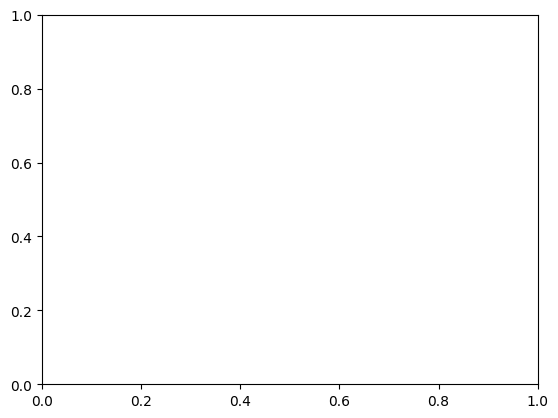

In [1]:
import seaborn as sns
sns.scatterplot()

In [3]:
#!pip install pandas_datareader

## Setting up dates using datetime module

In [8]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

## Retreiveing Data from all the listed bank above

In [ ]:
# Bank of America
BAC = data.DataReader('BAC', 'yahoo', start, end)

# CitiGroup
C = data.DataReader('C', 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader('GS', 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader('JPM', 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader('MS', 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader('WFC', 'yahoo', start, end)

### Alternate for grabbing data togather
# Data can also be retreived for a list object
da = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'], 'yahoo', start, end)
#### Creating a list of the ticher symbols (as string) in alphabetical order for easy reference down the line
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
### Combing all the individual dataframes into a single dataframe

bank_stocks = pd.concat(tickers, axis=1, keys=tickers)
#Setting the column name levels. This will make it easier to differentiate the data of different banks.
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']
# Checking the head of the bank_stocks dataframe to see how the data looks and if concatenation is done as desired.
bank_stock.head()
# explorarory data analysis
# What is the max close price for each bank's stock throughout the time period?
bank_stock.xs(key='Close', axis=1, level='Stock Info').max()
# What are the returns of each bank's stock
returns = pd.DataFrame()

for tick in tickers:
    returns[tick+'Returns'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

sns.pairplot(returns[1:])
returns.idxmin()
returns.idxmax()
returns.std()
returns.loc['2025-01-01':'2015-12-31'].std()
sns.histplot(returns.loc['2015-01-01':'2015-12-31']['MS Returns'], color='green')
sns.histplot(returns.loc['2008-01-01':'2008-12-31']['C Returns'], color='red')

# Additional Import for Visualization

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

# import for ploty
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf

init_notebook_mode(connected=True)
cf.go_offline()

bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()
# Moving Averages
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')
#Tecnical Analisis plots
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

In [19]:
import requests

response = requests.get("https://api.github.com/search/repositories",
                        params={"q": "language:python", "sort": "stars", "order": "desc"})
json_response = response.json()
popular_repositories = json_response['items']
for repo in popular_repositories[:3]:
    print(f'Name: {repo["name"]}')
    print(f'Description: {repo["description"]}')
    print(f'Stars: {repo["stargazers_count"]}')
    print()

Name: public-apis
Description: A collective list of free APIs
Stars: 316767

Name: Python
Description: All Algorithms implemented in Python
Stars: 193989

Name: transformers
Description: 🤗 Transformers: State-of-the-art Machine Learning for Pytorch, TensorFlow, and JAX.
Stars: 134470



In [ ]:
import requests

t = requests.get(
    "https://api.github.com/search/repositories", 
    [("q", "language:python"), ("sort", "stars"), ("order", "desc")],)
t.json()

In [ ]:
dati = requests.get("https://api.github.com/search/repositories", 
                    params=b"q=language:python&sort=stars&order=desc",)
dati.json()

In [45]:
import requests

response = requests.get(
    'https://api.github.com/search/repositories',
    params = {'q':'real python'},
    headers = {'Accept': 'applications/vnd.github.text-match+json'}
)
json_response = response.json()
first_repository = json_response['items'][0]
first_repository['text_matches'][0]['matches']

[{'text': 'real', 'indices': [59, 63]}]

In [46]:
import requests

requests.get("https://httpbin.org/get")

requests.post("https://httpbin.org/post", data={"key": "value"})

requests.put("https://httpbin.org/put", data={"key": "value"})

requests.delete("https://httpbin.org/delete")

requests.head("https://httpbin.org/get")

requests.patch("https://httpbin.org/patch", data={"key": "value"})

requests.options("https://httpbin.org/get")


<Response [200]>

In [50]:
requests.request('GET', 'https://httpbin.org/get')

<Response [200]>

In [61]:
response = requests.head('https://httpbin.org/get')
response.headers['Content-Type']

response = requests.delete('https://httpbin.org/delete')
json_response = response.json()
json_response['args']

{}

In [ ]:
#!pip install ydata-profiling

In [ ]:

import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

df = pd.DataFrame(np.random.rand(100, 5), columns=["a", "b", "c", "d", "e"])
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

In [ ]:
#!pip install sweetviz

In [68]:
import sweetviz as sv

my_report = sv.analyze(df)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [4]:
# inviare dati in un formato specifico

import requests
# inviamo dati come dizionario
response = requests.post('https://httpbin.org/post', data={'key':'value'})
# inviamo i dati come tuple
response = requests.post('https://httpbin.org/post', data=[('key','value')])

In [12]:
import requests
# inviamo dati come dizionario
response = requests.post('https://httpbin.org/post', data={'key':'value'})
json_response = response.json()
json_response['data']
json_response['headers']['Content-Type']

'application/x-www-form-urlencoded'

In [20]:
import requests
# inviamo dati come dizionario
response = requests.post('https://httpbin.org/post', json={'key':'value'})
#json_response = response.json()
# inspezioniamo la risposta
response.request.headers['Content-Type']
response.request.url
response.request.body

b'{"key": "value"}'

In [2]:
# richiesta di dati da api tramite autenticazione
import requests

response = requests.get(
    'https://httpbin.org/basic-auth/user/passwd',
    auth=('user', 'passwd')
)

response.status_code
response.request.headers['Authorization']

'Basic dXNlcjpwYXNzd2Q='

In [3]:
from requests.auth import HTTPBasicAuth

requests.get('https://httpbin.org/basic-auth/user/passwd',
             auth=HTTPBasicAuth('user','passwd'))


<Response [200]>

In [8]:
requests.get('https://api.github.com/user')

<Response [401]>

In [12]:
import requests

token = "<YOUR_GITHUB_PA_TOKEN>"
response = requests.get(
     "https://api.github.com/user",
     auth=("", token)
)
response.status_code
response.json()
response.request.headers['Authorization']


'Basic OjxZT1VSX0dJVEhVQl9QQV9UT0tFTj4='

In [ ]:
import requests
from requests.auth import AuthBase

class TokenAuth(AuthBase):
    """Implements a token authentication scheme."""

    def __init__(self, token):
        self.token = token
    
    def __cal__(self, request):
        """Attach an API token to the Autorization header."""
        request.headers['Authorization'] = f'Bearer {self.token}'
        return request

token = "<YOUR_GITHUB_PA_TOKEN>"
response = requests.get(
    'https://api.github.com/user',
    auth = TokenAuth(token)
)
response.status_code
response.request.headers['Authorization']

In [17]:
requests.get("https://api.github.com", verify=False)

c:\Users\Utente\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.github.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


<Response [200]>

In [ ]:
requests.get('https://api.github.com', timeout=1)
requests.get('https://api.github.com', timeout=3.05)
# connessione entro 3.05 e dati entro i 5
requests.get('https://api.github.com', timeout=(3.05, 5))


<Response [200]>

In [25]:
import requests
from requests.exceptions import Timeout

try:
    response = requests.get('https://api.github.com', timeout=(3.05, 5))
except Timeout:
    print('The request timed out')
else:
    print('The request did not time out')


The request did not time out


In [ ]:
import requests
from custom_token_auth import TokenAuth

TOKEN = '<YOUR_GITHUB_PA_TOKEN>'

with requests.Session() as session:
    session.auth = TokenAuth(TOKEN)

    first_response = session.get("https://api.github.com/user")
    second_response = session.get("https://api.github.com/user")

print(first_response.headers)
print(second_response.json())

In [28]:
import requests
from requests.adapters import HTTPAdapter
from requests.exceptions import RetryError

github_adapter = HTTPAdapter(max_retries=2)

session = requests.Session()

session.mount('https://api.github.com', github_adapter)

try:
    response = session.get('https://api.github.com/')
except RetryError as err:
    print(f'Error: {err}')
finally:
    session.close()


#CREO UN APP


In [ ]:
!pip install dash


In [ ]:
from dash import Dash, html

app = Dash()

app.layout = [html.Div(children='Hello World')]

if __name__ == '__main__':
    app.run(debug=True)


In [ ]:
# Import packages
from dash import Dash, html, dash_table
import pandas as pd

# Incorporate data
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminder2007.csv')

# Initialize the app
app = Dash()

# App layout
app.layout = [
    html.Div(children='My First App with Data'),
    dash_table.DataTable(data=df.to_dict('records'), page_size=10)
]

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


In [ ]:
# Import packages
from dash import Dash, html, dash_table, dcc
import pandas as pd
import plotly.express as px

# Incorporate data
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminder2007.csv')

# Initialize the app
app = Dash()

# App layout
app.layout = [
    html.Div(children='My First App with Data and a Graph'),
    dash_table.DataTable(data=df.to_dict('records'), page_size=10),
    dcc.Graph(figure=px.histogram(df, x='continent', y='lifeExp', histfunc='avg'))
]

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


In [ ]:
# Import packages
from dash import Dash, html, dash_table, dcc, callback, Output, Input
import pandas as pd
import plotly.express as px

# Incorporate data
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminder2007.csv')

# Initialize the app
app = Dash()

# App layout
app.layout = [
    html.Div(children='My First App with Data, Graph, and Controls'),
    html.Hr(),
    dcc.RadioItems(options=['pop', 'lifeExp', 'gdpPercap'], value='lifeExp', id='controls-and-radio-item'),
    dash_table.DataTable(data=df.to_dict('records'), page_size=6),
    dcc.Graph(figure={}, id='controls-and-graph')
]

# Add controls to build the interaction
@callback(
    Output(component_id='controls-and-graph', component_property='figure'),
    Input(component_id='controls-and-radio-item', component_property='value')
)
def update_graph(col_chosen):
    fig = px.histogram(df, x='continent', y=col_chosen, histfunc='avg')
    return fig

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


In [ ]:
# Import packages
from dash import Dash, html, dash_table, dcc, callback, Output, Input
import pandas as pd
import plotly.express as px

# Incorporate data
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminder2007.csv')

# Initialize the app - incorporate css
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = Dash(external_stylesheets=external_stylesheets)

# App layout
app.layout = [
    html.Div(className='row', children='My First App with Data, Graph, and Controls',
             style={'textAlign': 'center', 'color': 'blue', 'fontSize': 30}),

    html.Div(className='row', children=[
        dcc.RadioItems(options=['pop', 'lifeExp', 'gdpPercap'],
                       value='lifeExp',
                       inline=True,
                       id='my-radio-buttons-final')
    ]),

    html.Div(className='row', children=[
        html.Div(className='six columns', children=[
            dash_table.DataTable(data=df.to_dict('records'), page_size=11, style_table={'overflowX': 'auto'})
        ]),
        html.Div(className='six columns', children=[
            dcc.Graph(figure={}, id='histo-chart-final')
        ])
    ])
]

# Add controls to build the interaction
@callback(
    Output(component_id='histo-chart-final', component_property='figure'),
    Input(component_id='my-radio-buttons-final', component_property='value')
)
def update_graph(col_chosen):
    fig = px.histogram(df, x='continent', y=col_chosen, histfunc='avg')
    return fig

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


In [ ]:
# Importiamo le librerie e i pacchetti
# dcc = Dach Core Components == rendering grafici iterattivi
from dash import Dash, html, dash_table, dcc, callback, Output, Input
import pandas as pd
import plotly.express as px

# Incorporiamo i dati in formato csv dal web
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminder2007.csv')
#print(df.head())
# Inizializziamo l'app ed incorporiamo il css
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = Dash(external_stylesheets=external_stylesheets) # inserisco il file di sile css

# Creiamo il layout
app.layout = [
    html.Div(className = 'row', children='My First App with Data, Graph, and Controls',
             style={'textAlign':'center', 'color':'blue', 'fontSize':30}), # centro, coloro e dimensione del titolo
    
    #scelgo le varie opzioni di select
    html.Div(className='row', children=[
        dcc.RadioItems(options=['pop', 'lifeExp', 'gdpPercap'],
                       value='lifeExp',
                       #inline='True',
                       id='my-radio-buttons-final')
    ]),

    ## creo il div che conterrà il dataframe e l'istogramma corrispondente
    html.Div(className='row', children=[
        html.Div(className='six columns', children=[
            dash_table.DataTable(data=df.to_dict('records'), page_size=11, style_table={'overflowX':'auto'})
        ]),
        html.Div(className='six columns', children=[
            dcc.Graph(figure={}, id='histo-chart-final')
        ])
    ]),

        #html.Hr(),
        # inserisco le possibili scelte
        #dcc.RadioItems(options=['pop', 'lifeExp', 'gdpPercap'], value='lifeExp', id = 'controls-and-radio-item'),
        # creo una tabella con il df, specifico records per avere un dizionario per ogni caso
        #dash_table.DataTable(data=df.to_dict('records'), page_size=6),
        # costruisco un grafico interattivo tramite dcc.Graph, passandogli
        # l'histogramma costruito con plotly, calcolando la media per ogni continente, x continenti, y lifeexp, 
            #dcc.Graph(figure=px.histogram(df, x='continent', y='lifeExp', histfunc='avg'))
        #dcc.Graph(figure={}, id='controls-and-graph')
]

#Aggiungiamo i controlli per costruire le interazioni
@callback(
    Output(component_id='histo-chart-final', component_property='figure'),
    Input(component_id='my-radio-buttons-final', component_property='value')
)

# creo una funzione che ritorna l'istogramma della colonna scelta
def update_graph(col_chosen):
    fig = px.histogram(df, x='continent', y=col_chosen, histfunc='avg')
    return fig

if __name__ == '__main__':
    app.run(debug=True)

In [ ]:
#!pip install dash_design_kit


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Import packages    #SERVE VERSIONE ENTERPRISE
from dash import Dash, html, dash_table, dcc, callback, Output, Input
import pandas as pd
import plotly.express as px
import dash_design_kit as ddk

# Incorporate data
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminder2007.csv')

# Initialize the app
app = Dash(__name__)

# App layout
app.layout = ddk.App([
    ddk.Header(ddk.Title('My First App with Data, Graph, and Controls')),
    dcc.RadioItems(options=['pop', 'lifeExp', 'gdpPercap'],
                    value='lifeExp',
                    inline=True,
                    id='my-ddk-radio-items-final'),
    ddk.Row([
        ddk.Card([
            dash_table.DataTable(data=df.to_dict('records'), page_size=12, style_table={'overflowX': 'auto'})
        ], width=50),
        ddk.Card([
            ddk.Graph(figure={}, id='graph-placeholder-ddk-final')
        ], width=50),
    ]),

])

# Add controls to build the interaction
@callback(
    Output(component_id='graph-placeholder-ddk-final', component_property='figure'),
    Input(component_id='my-ddk-radio-items-final', component_property='value')
)
def update_graph(col_chosen):
    fig = px.histogram(df, x='continent', y=col_chosen, histfunc='avg')
    return fig

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


In [ ]:
!pip install dash_bootstrap_components

In [ ]:
# Import packages
from dash import Dash, html, dash_table, dcc, callback, Output, Input
import pandas as pd
import plotly.express as px
import dash_bootstrap_components as dbc

# Incorporate data
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminder2007.csv')

# Initialize the app - incorporate a Dash Bootstrap theme
external_stylesheets = [dbc.themes.CERULEAN]
app = Dash(__name__, external_stylesheets=external_stylesheets)

# App layout
app.layout = dbc.Container([
    dbc.Row([
        html.Div('My First App with Data, Graph, and Controls', className="text-primary text-center fs-3")
    ]),

    dbc.Row([
        dbc.RadioItems(options=[{"label": x, "value": x} for x in ['pop', 'lifeExp', 'gdpPercap']],
                       value='lifeExp',
                       inline=True,
                       id='radio-buttons-final')
    ]),

    dbc.Row([
        dbc.Col([
            dash_table.DataTable(data=df.to_dict('records'), page_size=12, style_table={'overflowX': 'auto'})
        ], width=6),

        dbc.Col([
            dcc.Graph(figure={}, id='my-first-graph-final')
        ], width=6),
    ]),

], fluid=True)

# Add controls to build the interaction
@callback(
    Output(component_id='my-first-graph-final', component_property='figure'),
    Input(component_id='radio-buttons-final', component_property='value')
)
def update_graph(col_chosen):
    fig = px.histogram(df, x='continent', y=col_chosen, histfunc='avg')
    return fig

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


In [ ]:
!pip install dash_mantine_components==0.12.1

In [41]:
!pip uninstall dash_mantine_components==0.14.7

^C


In [ ]:
from dash import Dash, dash_table, dcc, callback, Output, Input
import pandas as pd
import plotly.express as px
import dash_mantine_components as dmc

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminder2007.csv')

app = Dash()

app.layout = dmc.Container([
    dmc.Title('My First App with Data, Graph, and Controls', color="blue", size="h3"),
    dmc.RadioGroup(
            [dmc.Radio(i, value=i) for i in  ['pop', 'lifeExp', 'gdpPercap']],
            id='my-dmc-radio-item',
            value='lifeExp',
            size="sm"
        ),
    dmc.Grid([
        dmc.Col([
            dash_table.DataTable(data=df.to_dict('records'), page_size=12, style_table={'overflowX': 'auto'})
        ], span=6),
        dmc.Col([
            dcc.Graph(figure={}, id='graph-placeholder')
        ], span=6),
    ]),

], fluid=True)

@callback(
    Output(component_id='graph-placeholder', component_property='figure'),
    Input(component_id='my-dmc-radio-item', component_property='value')
)
def update_graph(col_chosen):
    fig = px.histogram(df, x='continent', y=col_chosen, histfunc='avg')
    return fig

if __name__ == '__main__':
    app.run(debug=True)